# PVE-analysis on research funding
*Collective Compass Project, DJA, 2022*

---

This notebook contains a basic first data analysis of the data from the Collective Compass project. It shows the data categorized per institute, career stage, discipline, and gender. The variables `kt_*` contain the chosen allocation of research money per predefined category.

---
## Loading the necessary Python modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import requests
plt.rcParams.update({'font.size': 14}) # must set in top
plt.rcParams.update({'figure.figsize': (14, 4)}) # must set in top

---
## Download the data

In [2]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
    with open('../data/dat.csv', 'wb') as f:
        f.write(response.content)

In [3]:
df = pd.read_csv('../data/dat.csv')

---
## Plot basic participation stats

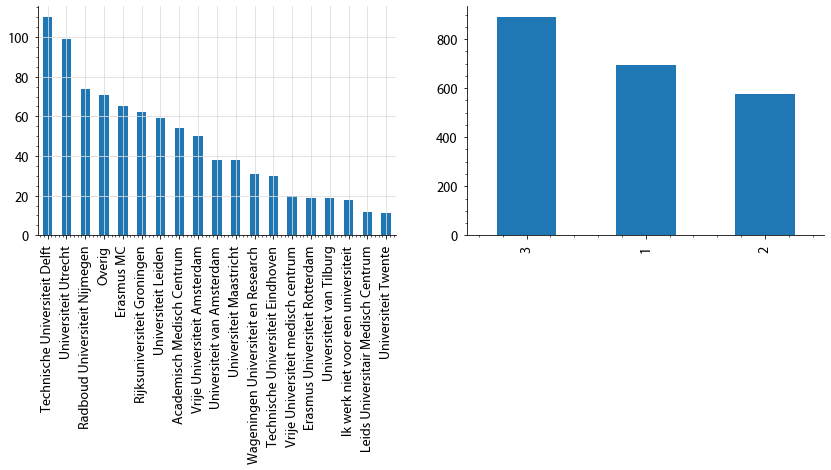

In [4]:
plt.figure()
plt.subplot(121)
df['institution'].value_counts().plot.bar()
plt.grid()
plt.subplot(122)
df['versie'].value_counts().plot.bar();

<AxesSubplot:>

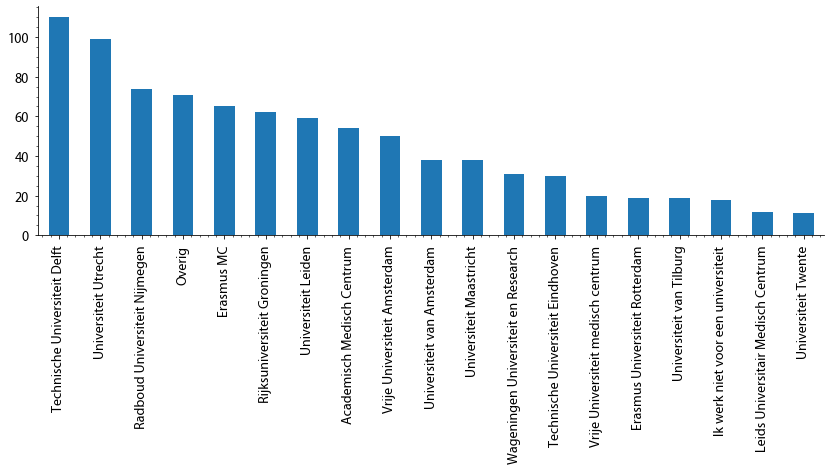

In [5]:
plt.figure()
df['institution'].value_counts().plot.bar()

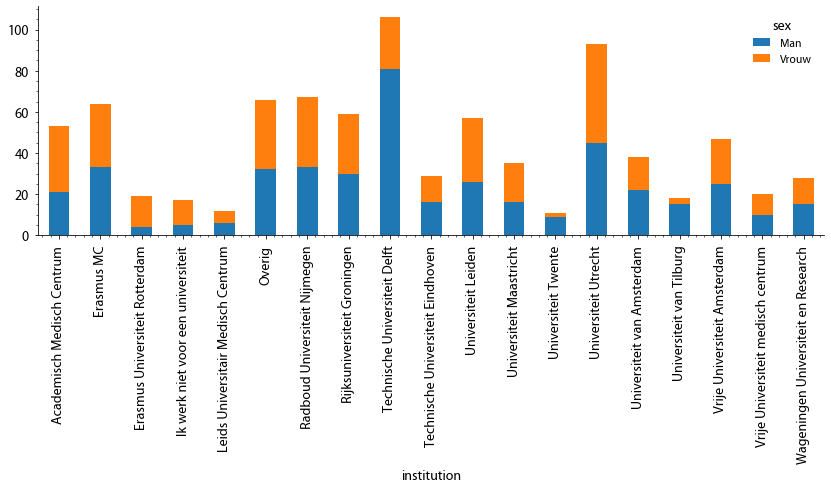

In [6]:
df_vals = df[['institution', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

<AxesSubplot:>

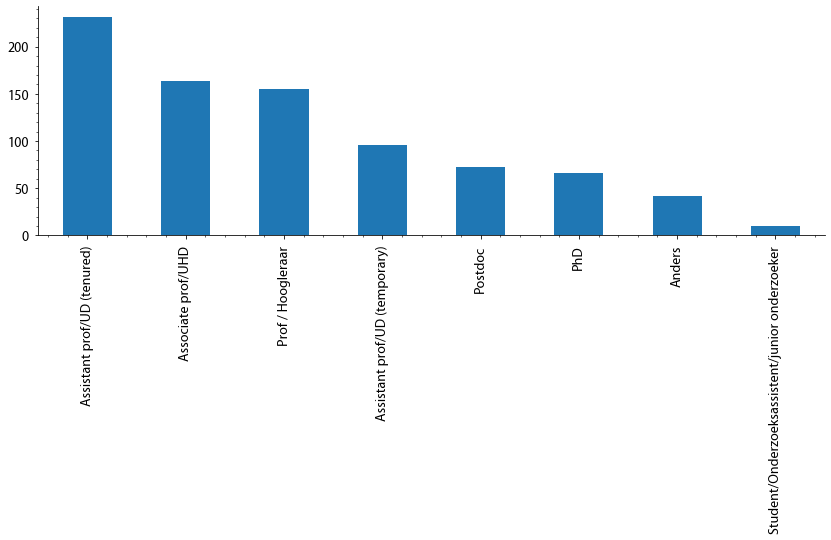

In [7]:
plt.figure()
df['pos9'].value_counts().plot.bar()

<AxesSubplot:>

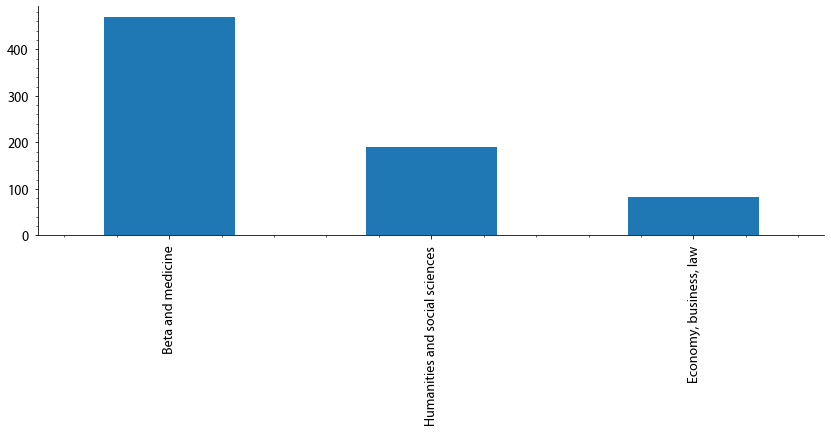

In [8]:
plt.figure()
df['discipline'].value_counts().plot.bar()

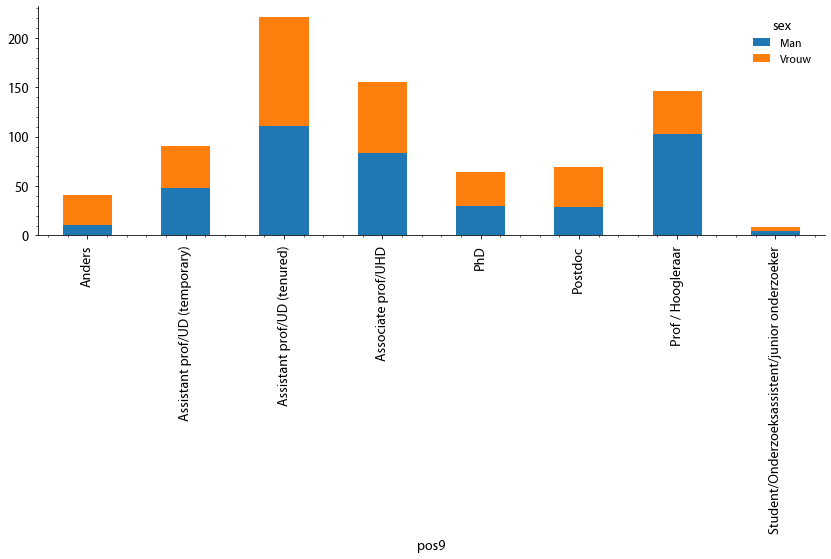

In [9]:
df_vals = df[['pos9', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

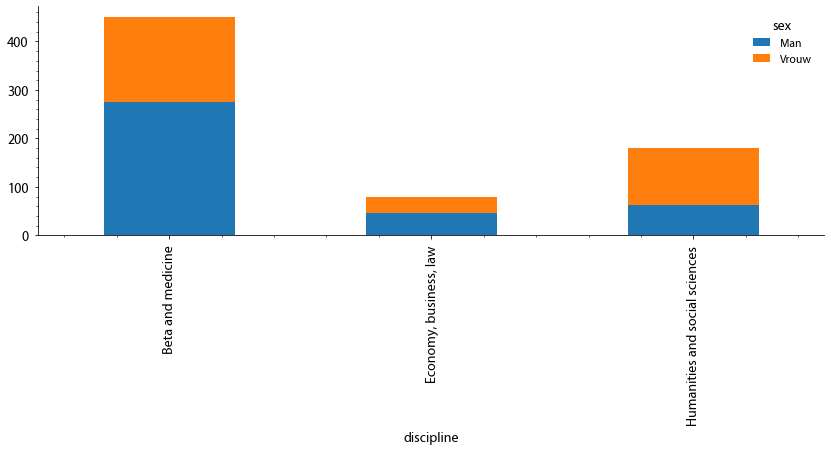

In [10]:
df_vals = df[['discipline', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

---
## Postprocess the kt values to fraction of the total budget.

In [42]:
# Second, we divide the spending by the total funds available.
# to make each kt_funds* a fraction of the total money spend.
mask = df.columns.str.contains('funds_available|versie|pos5|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

---
## Show the relative funding allocation for several groups (total funding, career stage ...)

In [43]:
# Create a table with the fraction spent per kt item per group.
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')] )
df_kt_per_version = df_kt.groupby('versie')[ kts ]
df_kt_per_version.mean()

,kt_funds_personal_senior,kt_funds_team,kt_funds_personal_ecr,kt_funds_thematic,kt_funds_thematic_co,kt_funds_small_first,kt_funds_small_second,kt_funds_award,kt_funds_first_ecr,kt_funds_rolling_ecr,kt_funds_rolling_senior
versie,,,,,,,,,,,
1,0.055412,0.062528,0.053544,0.082770,0.047237,0.060696,0.041371,0.007919,0.095895,0.273736,0.162656
2,0.054392,0.060697,0.063485,0.073816,0.045907,0.054849,0.034480,0.012102,0.136224,0.278783,0.151059
3,0.052416,0.062873,0.058520,0.094901,0.052266,0.056828,0.036695,0.007374,0.110779,0.281321,0.145083


In [44]:
# Print the fraction of the total money spent per experiment version (with differennt total budgets).
df_kt_per_version.mean().sum(axis=1)

versie
1    0.943764
2    0.965794
3    0.959057
dtype: float64

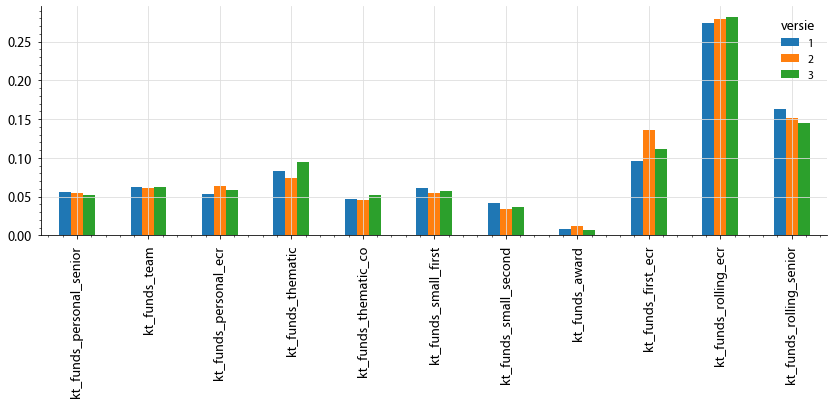

In [45]:
# Plot a histogram with a bar per version.
df_kt_per_version.mean().transpose().plot.bar()
plt.grid()

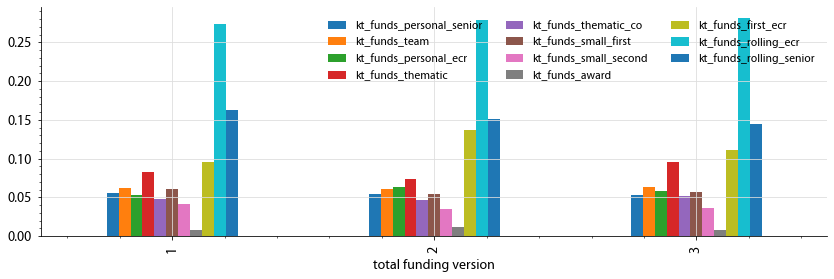

In [49]:
# Plot a histogram per version.
df_kt_per_version.mean().plot.bar(xlabel='total funding version');
plt.grid()
plt.legend(loc=0, ncol=3)

In [47]:
# Create a table with the fraction spent per kt item per career stage.
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')] )
df_kt_per_pos5 = df_kt.groupby('pos5')[ kts ]
df_kt_per_pos5.mean()

,kt_funds_personal_senior,kt_funds_team,kt_funds_personal_ecr,kt_funds_thematic,kt_funds_thematic_co,kt_funds_small_first,kt_funds_small_second,kt_funds_award,kt_funds_first_ecr,kt_funds_rolling_ecr,kt_funds_rolling_senior
pos5,,,,,,,,,,,
"Assistant, associate (permanent)",0.052332,0.058532,0.049020,0.086299,0.043603,0.058514,0.036986,0.009215,0.104219,0.321850,0.145322
Assistant/associate prof/UD (temporary contract),0.066060,0.065500,0.056139,0.085622,0.056383,0.058161,0.038459,0.008901,0.105172,0.292023,0.127876
Hoogleraar/professor,0.072755,0.077409,0.058755,0.081948,0.037334,0.031559,0.022819,0.008011,0.107580,0.234271,0.205702
Other,0.052775,0.064523,0.060020,0.079875,0.042939,0.050307,0.037833,0.010357,0.105199,0.247736,0.178994
Student-PhD-Postdoc-OA = ECR,0.038896,0.058550,0.082712,0.089502,0.069495,0.075103,0.046965,0.007105,0.150705,0.203839,0.134529


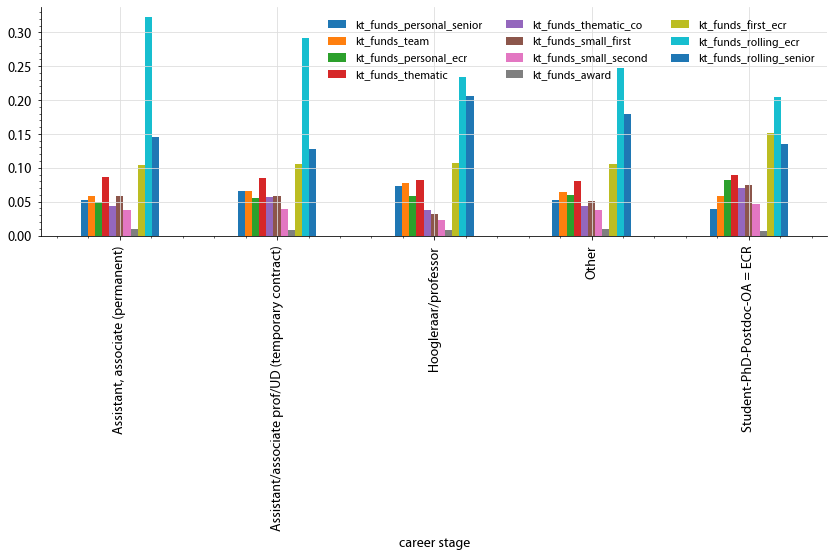

In [48]:
df_kt_per_pos5.mean().plot.bar(xlabel='career stage');
plt.grid()
plt.legend(loc=0, ncol=3)